# Jonathan Halverson
# July 2020
# NSF report on MRI nodes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('halverson')

Read in the kibana data

In [3]:
cols = ['@eligible', '@end', '@start', '@submit']
kib = pd.read_csv('datascience_partition.csv', thousands=',', parse_dates=cols)
kib.head(2).T

,0,1
@eligible,"Jul 22, 2020 @ 03:27:46.000","Jul 22, 2020 @ 03:16:08.000"
@end,"Jul 22, 2020 @ 03:49:28.000","Jul 22, 2020 @ 03:26:45.000"
@start,"Jul 22, 2020 @ 03:27:51.000","Jul 22, 2020 @ 03:16:14.000"
@submit,"Jul 22, 2020 @ 03:27:46.000","Jul 22, 2020 @ 03:16:08.000"
_id,KUWjdHMBGIM0vzVe-P4_,B0SPdHMBGIM0vzVeKZfi
_index,slurm,slurm
_score,NaN,NaN
_type,jobcomp,jobcomp
account,ee,ee
alloc_node,della5,della5


In [4]:
kib['@eligible'] = pd.to_datetime(kib['@eligible'].str.replace('@', ''))
kib['@end'] = pd.to_datetime(kib['@end'].str.replace('@', ''))
kib['@start'] = pd.to_datetime(kib['@start'].str.replace('@', ''))
kib['@submit'] = pd.to_datetime(kib['@submit'].str.replace('@', ''))

Write out jobid's to feed into seff externally

In [5]:
import numpy as np
np.savetxt('all_ids.txt', kib.jobid.values, fmt='%d')

Read in department and sponsor for each user on della

In [6]:
users = pd.read_csv('cached_users.csv')
users.head()

,NETID,POSITION,DEPT,SPONSOR
0,aa22,G3,EE,de Leon
1,aagles,G3,CBE,Bourg
2,aalt,G6,ASTRO/PPPL,Cohen
3,aamatya,Udrg2021,GEO,Resplandy
4,aan2,G4,CEE,Adriaenssens


Join the kibana dataframe with the user dataframe

In [7]:
kib_users = pd.merge(kib, users, how='left', left_on=['username'], right_on=['NETID'])

Read in the memory for each jobid as obtained from seff

In [8]:
mem = pd.read_csv('jobid_mem_totalmem.csv', header=None)
mem.columns = ['jobid', 'maxmem', 'totalmem']
# convert from MB to GB
mem.totalmem = mem.totalmem * 1e-3
mem.maxmem = mem.maxmem * 1e-3

Join memory dataframe to the output of the previous join

In [9]:
df = pd.merge(kib_users, mem, how='left', on='jobid')
df.head(2).T

,0,1
@eligible,2020-07-22 03:27:46,2020-07-22 03:16:08
@end,2020-07-22 03:49:28,2020-07-22 03:26:45
@start,2020-07-22 03:27:51,2020-07-22 03:16:14
@submit,2020-07-22 03:27:46,2020-07-22 03:16:08
_id,KUWjdHMBGIM0vzVe-P4_,B0SPdHMBGIM0vzVeKZfi
_index,slurm,slurm
_score,NaN,NaN
_type,jobcomp,jobcomp
account,ee,ee
alloc_node,della5,della5


## dataframe is now assembled

How many jobs appear in the dataset?

In [10]:
df.shape[0]

3966

When did the first job start running?

In [11]:
df['@start'].min()

Timestamp('2020-01-22 13:36:36')

When did the last job in the dataset start running?

In [12]:
df['@start'].max()

Timestamp('2020-07-22 03:27:51')

How many jobs used zero cpu-hours? cpu_hours is wall_time times num_cpus.

In [13]:
df[df.cpu_hours == 0].shape[0]

232

How many jobs had zero wall-clock time? Elapsed time is wall time is seconds.

In [14]:
df[df.elapsed == 0].shape[0]

227

How many jobs used more memory than what was allocated (this should be impossible)?

In [15]:
df[(df.maxmem > df.totalmem)].shape[0]

18

How many jobs allocated more than 7 TB (this is slurmdb being wrong)?

In [16]:
df[df.totalmem > 7000].shape[0]

1

Below we overwrite this value.

Breakdown by job state

In [17]:
df.state.value_counts()

COMPLETED        2885
FAILED            418
CANCELLED         379
TIMEOUT           205
OUT_OF_MEMORY      75
NODE_FAIL           4
Name: state, dtype: int64

Breakdown by user

In [18]:
df.username.value_counts()

mcahn       1657
jiachenl     416
kirylp       321
sbenton      301
karahan      270
joledan      261
aerez        123
ac77         107
bill          59
ab50          47
jlatkins      37
dkoffman      34
angl          32
eschrom       31
mtm2          29
plazonic      27
yibings       24
peirongl      20
adorjani      18
ekalhor       17
nvrocha       16
lmakin        15
tgartner      13
skates        12
jknodt        11
aj13          10
ghimmels       9
fpopov         9
zywang         5
gwg3           5
shuow          5
nengbom        4
schester       4
jdh4           3
aliston        3
ferdowsi       3
jkutasov       2
zgarvin        2
bw16           1
reneel         1
mrajeev        1
mbolot         1
Name: username, dtype: int64

Breakdown by department

In [19]:
df.DEPT.value_counts()

CSES         1731
PHYSICS      1082
POLITICS      368
EE            302
MOLBIO        123
EEB            89
PICSciE        62
CEE            60
CS             26
CHEM           17
GEO             6
CBE             5
ECONOMICS       4
Name: DEPT, dtype: int64

Breakdown by node

In [20]:
df.nodes.value_counts()

della-h17n1           768
della-h12n5           644
della-h12n9           532
della-h12n4           450
della-h12n6           389
della-h12n10          279
(null)                214
della-h12n7           147
della-h12n8           146
della-h12n13          127
della-h12n11           82
della-h12n1            67
della-h12n2            46
della-h12n12           44
della-h12n3            30
della-h12n[5,8-10]      1
Name: nodes, dtype: int64

How many jobs had an empty Slurm script (is this salloc)?

In [21]:
df[df.script.isnull()].shape[0]

84

In [22]:
df.maxmem.max()

5890.0

In [23]:
df.totalmem.max()

2860000.0

In [24]:
df[df.totalmem < 0.1e3].shape[0]

41

In [25]:
df[df.totalmem < 0.5e3].shape[0]

2999

In [26]:
df[df.totalmem < 1e3].shape[0] / df.shape[0] / 0.01

89.25869894099849

In [27]:
df[df.totalmem > 1e3].shape[0]

361

In [28]:
df[df.totalmem > 3e3].shape[0] / df.shape[0] / 0.01

2.2945032778618253

In [29]:
df[(df.totalmem > 1e3) & (df.totalmem < 3e3)].shape[0]

270

In [30]:
df[df.totalmem > 1e4].shape[0]

1

In [31]:
df.at[3745, 'totalmem'] = 2.83e3

In [106]:
fields = ['groupname', 'cpu_hours', 'totalmem', 'jobid']
actions = {'jobid':'size', 'cpu_hours':'sum', 'totalmem':'mean'}
cmb = df[fields].groupby(by='groupname').agg(actions).reset_index()
cmb.columns = ['Department', 'Jobs', 'Total CPU-Hours', 'Average Memory (GB)']
cmb['Total CPU-Hours'] = cmb['Total CPU-Hours'].apply(round)
cmb['Average Memory (GB)'] = cmb['Average Memory (GB)'].apply(round)
print(cmb.sort_values(by='Jobs', ascending=False).to_string(index=False))

Department  Jobs  Total CPU-Hours  Average Memory (GB)
    molbio  1832            58053                  280
   physics  1082           569866                  497
  politics   398            36605                 1716
        ee   302           124296                  319
      cses    89                1                  770
       eeb    84             5941                 1111
       cee    60              244                  748
     socio    44              410                  518
        cs    26              318                  260
      chem    17                2                   74
       wws    17               21                 2228
  genomics     5              117                   13
       geo     5             1931                  259
      econ     4                2                   18
   geoclim     1               39                  192


In [107]:
fields = ['username', 'groupname', 'cpu_hours', 'totalmem', 'jobid', ]
actions = {'groupname':'first', 'jobid':'size', 'cpu_hours':'sum', 'totalmem':'mean'}
cmb = df[fields].groupby(by='username').agg(actions).reset_index()
cmb.columns = ['Username', 'Department', 'Jobs', 'Total CPU-Hours', 'Average Memory (GB)']
cmb['Total CPU-Hours'] = cmb['Total CPU-Hours'].apply(round)
cmb['Average Memory (GB)'] = cmb['Average Memory (GB)'].apply(round)
print(cmb.sort_values(by='Average Memory (GB)', ascending=False).to_string(index=False))

 Username Department  Jobs  Total CPU-Hours  Average Memory (GB)
     ac77   politics   107             5712                 2768
  ekalhor        wws    17               21                 2228
     jdh4       cses     3                0                 1987
 jlatkins        eeb    37             1619                 1828
  joledan   politics   261            27919                 1426
  nvrocha        cee    16              181                 1148
   lmakin        eeb    15                2                 1000
     ab50     molbio    47            29091                  997
  yibings        cee    24               49                  944
   kirylp    physics   321           434770                  900
     bill       cses    59                0                  856
 adorjani   politics    18             1686                  738
  zgarvin        geo     2             1064                  576
 ghimmels      socio     9              271                  552
 dkoffman      socio    3

## Low memory lately

In [34]:
lw = df[(df['@end'] > '07-15-2020') & (df.totalmem < 0.5e3)]
lw

,@eligible,@end,@start,@submit,_id,_index,_score,_type,account,alloc_node,...,total_nodes,user_id,username,work_dir,NETID,POSITION,DEPT,SPONSOR,maxmem,totalmem
0,2020-07-22 03:27:46,2020-07-22 03:49:28,2020-07-22 03:27:51,2020-07-22 03:27:46,KUWjdHMBGIM0vzVe-P4_,slurm,NaN,jobcomp,ee,della5,...,1,153149,karahan,/scratch/gpfs/karahan/filter_experiment,karahan,G2,EE,Sengupta,128.15,256.0
1,2020-07-22 03:16:08,2020-07-22 03:26:45,2020-07-22 03:16:14,2020-07-22 03:16:08,B0SPdHMBGIM0vzVeKZfi,slurm,NaN,jobcomp,ee,della5,...,1,153149,karahan,/scratch/gpfs/karahan/filter_experiment,karahan,G2,EE,Sengupta,123.65,256.0
2,2020-07-22 03:12:12,2020-07-22 03:14:20,2020-07-22 03:12:27,2020-07-22 03:12:12,AEODdHMBGIM0vzVezNTI,slurm,NaN,jobcomp,ee,della5,...,1,153149,karahan,/scratch/gpfs/karahan/filter_experiment,karahan,G2,EE,Sengupta,49.37,256.0
3,2020-07-21 17:11:40,2020-07-21 18:50:07,2020-07-21 17:12:21,2020-07-21 17:11:40,biC2cnMBGIM0vzVeLcnw,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.91,200.0
4,2020-07-21 17:11:40,2020-07-21 18:46:05,2020-07-21 17:12:21,2020-07-21 17:11:40,rCCycnMBGIM0vzVedoXR,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.25,200.0
5,2020-07-21 17:11:40,2020-07-21 18:46:55,2020-07-21 17:12:21,2020-07-21 17:11:40,QyCzcnMBGIM0vzVePpM-,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.00,200.0
6,2020-07-21 17:11:40,2020-07-21 18:47:26,2020-07-21 17:12:21,2020-07-21 17:11:40,LiCzcnMBGIM0vzVeuJsT,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,23.68,200.0
7,2020-07-21 17:11:40,2020-07-21 18:49:48,2020-07-21 17:12:21,2020-07-21 17:11:40,kyC1cnMBGIM0vzVe4cNA,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.89,200.0
8,2020-07-21 17:11:39,2020-07-21 18:45:40,2020-07-21 17:12:05,2020-07-21 17:11:39,USCycnMBGIM0vzVeFX9h,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.18,200.0
9,2020-07-21 17:11:39,2020-07-21 18:47:24,2020-07-21 17:12:05,2020-07-21 17:11:39,7SCzcnMBGIM0vzVesJo6,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,23.74,200.0


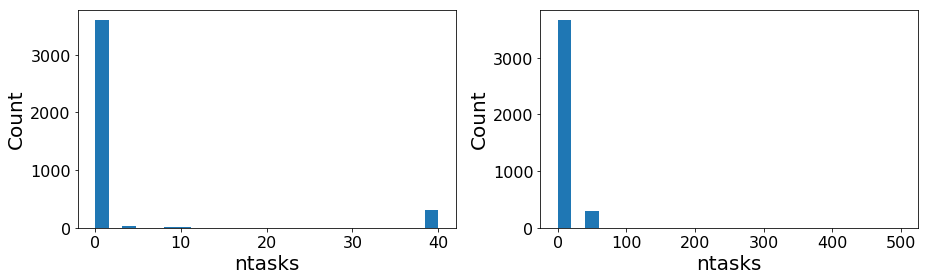

In [35]:
plt.figure(figsize=(13, 4))

plt.subplot(121)
plt.hist(df.ntasks_per_node, bins=25)
plt.xlabel('ntasks')
plt.ylabel('Count')

plt.subplot(122)
plt.hist(df.ntasks_per_node, bins=25, range=(0, 500))
plt.xlabel('ntasks')
plt.ylabel('Count')

plt.tight_layout()

## Jobid

In [36]:
df[df.jobid==31237735].T

,29
@eligible,2020-07-20 10:19:27
@end,2020-07-20 12:12:17
@start,2020-07-20 10:20:55
@submit,2020-07-20 10:19:27
_id,QqQjbHMBGIM0vzVemMCP
_index,slurm
_score,NaN
_type,jobcomp
account,physics
alloc_node,della5


In [37]:
print(df[df.jobid == 31237735].script.values[0])

#!/usr/bin/env bash
#SBATCH --job-name=nsi_sim_grp8
#SBATCH --mem=204800
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=40
#SBATCH --cpus-per-task=1
#SBATCH --time=3:30:00
#SBATCH --partition=physics
set -x
cd $SLURM_SUBMIT_DIR
export OMP_NUM_THREADS=1
mpiexec -n 40  /home/sbenton/spider_tools/scratch/sjb/nsi/simulation_spectra.py --output /scratch/gpfs/sbenton/spider/nsi_spectra --nsi-root /tigress/sbenton/spider/maps/nsi_maps --r 0.32 --r0 1.0 --n-chunks 14 --template-freq 217 --template-subset full --no-lcdm --no-template-noise --freqs 90 147 --alphas 0.0 0.0 --sim-index 175
mpiexec -n 40  /home/sbenton/spider_tools/scratch/sjb/nsi/simulation_spectra.py --output /scratch/gpfs/sbenton/spider/nsi_spectra --nsi-root /tigress/sbenton/spider/maps/nsi_maps --r 0.32 --r0 1.0 --n-chunks 14 --template-freq 217 --template-subset full --no-lcdm --no-template-noise --freqs 90 147 --alphas 0.0 0.0 --sim-index 176
mpiexec -n 40  /home/sbenton/spider_tools/scratch/sjb/nsi/simulation_spectra.py --outp

# ntasks

In [38]:
100 * df[df.ntasks.isnull()].shape[0] / df.shape[0]

0.0

In [39]:
df.ntasks.value_counts()

0      1835
1      1655
40      301
4        59
48       46
10       17
36       13
8        13
2        12
50        3
12        3
24        2
6         2
20        2
64        1
112       1
16        1
Name: ntasks, dtype: int64

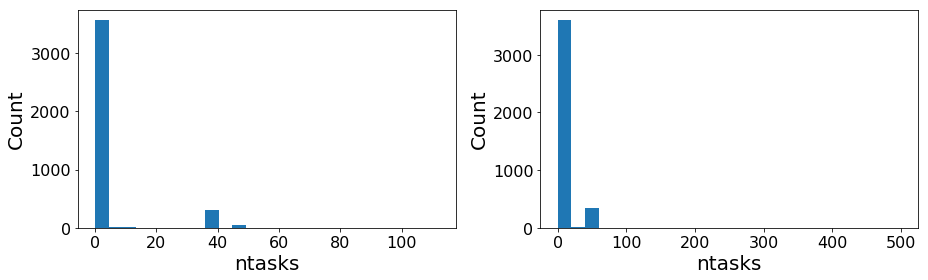

In [40]:
plt.figure(figsize=(13, 4))

plt.subplot(121)
plt.hist(df.ntasks, bins=25)
plt.xlabel('ntasks')
plt.ylabel('Count')

plt.subplot(122)
plt.hist(df.ntasks, bins=25, range=(0, 500))
plt.xlabel('ntasks')
plt.ylabel('Count')

plt.tight_layout()

## Serial

In [41]:
df.total_cpus.value_counts().sort_index()

0       153
1       157
2        16
3         1
4       182
6        96
8      1714
10      406
12        8
14       14
15        1
16       77
18        4
20       39
22        2
24       21
25       46
27        1
28        5
30       16
32       29
36       12
40      269
48      204
50        2
56        1
64      251
96      238
112       1
Name: total_cpus, dtype: int64

In [42]:
df.username.value_counts()

mcahn       1657
jiachenl     416
kirylp       321
sbenton      301
karahan      270
joledan      261
aerez        123
ac77         107
bill          59
ab50          47
jlatkins      37
dkoffman      34
angl          32
eschrom       31
mtm2          29
plazonic      27
yibings       24
peirongl      20
adorjani      18
ekalhor       17
nvrocha       16
lmakin        15
tgartner      13
skates        12
jknodt        11
aj13          10
ghimmels       9
fpopov         9
zywang         5
gwg3           5
shuow          5
nengbom        4
schester       4
jdh4           3
aliston        3
ferdowsi       3
jkutasov       2
zgarvin        2
bw16           1
reneel         1
mrajeev        1
mbolot         1
Name: username, dtype: int64

In [43]:
df[df.total_cpus != 1]

,@eligible,@end,@start,@submit,_id,_index,_score,_type,account,alloc_node,...,total_nodes,user_id,username,work_dir,NETID,POSITION,DEPT,SPONSOR,maxmem,totalmem
0,2020-07-22 03:27:46,2020-07-22 03:49:28,2020-07-22 03:27:51,2020-07-22 03:27:46,KUWjdHMBGIM0vzVe-P4_,slurm,NaN,jobcomp,ee,della5,...,1,153149,karahan,/scratch/gpfs/karahan/filter_experiment,karahan,G2,EE,Sengupta,128.15,256.0
1,2020-07-22 03:16:08,2020-07-22 03:26:45,2020-07-22 03:16:14,2020-07-22 03:16:08,B0SPdHMBGIM0vzVeKZfi,slurm,NaN,jobcomp,ee,della5,...,1,153149,karahan,/scratch/gpfs/karahan/filter_experiment,karahan,G2,EE,Sengupta,123.65,256.0
2,2020-07-22 03:12:12,2020-07-22 03:14:20,2020-07-22 03:12:27,2020-07-22 03:12:12,AEODdHMBGIM0vzVezNTI,slurm,NaN,jobcomp,ee,della5,...,1,153149,karahan,/scratch/gpfs/karahan/filter_experiment,karahan,G2,EE,Sengupta,49.37,256.0
3,2020-07-21 17:11:40,2020-07-21 18:50:07,2020-07-21 17:12:21,2020-07-21 17:11:40,biC2cnMBGIM0vzVeLcnw,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.91,200.0
4,2020-07-21 17:11:40,2020-07-21 18:46:05,2020-07-21 17:12:21,2020-07-21 17:11:40,rCCycnMBGIM0vzVedoXR,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.25,200.0
5,2020-07-21 17:11:40,2020-07-21 18:46:55,2020-07-21 17:12:21,2020-07-21 17:11:40,QyCzcnMBGIM0vzVePpM-,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.00,200.0
6,2020-07-21 17:11:40,2020-07-21 18:47:26,2020-07-21 17:12:21,2020-07-21 17:11:40,LiCzcnMBGIM0vzVeuJsT,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,23.68,200.0
7,2020-07-21 17:11:40,2020-07-21 18:49:48,2020-07-21 17:12:21,2020-07-21 17:11:40,kyC1cnMBGIM0vzVe4cNA,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.89,200.0
8,2020-07-21 17:11:39,2020-07-21 18:45:40,2020-07-21 17:12:05,2020-07-21 17:11:39,USCycnMBGIM0vzVeFX9h,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,24.18,200.0
9,2020-07-21 17:11:39,2020-07-21 18:47:24,2020-07-21 17:12:05,2020-07-21 17:11:39,7SCzcnMBGIM0vzVesJo6,slurm,NaN,jobcomp,physics,della5,...,1,111558,sbenton,/scratch/gpfs/sbenton/spider/nsi_spectra/logs,sbenton,Staff,PHYSICS,Jones,23.74,200.0


In [44]:
df[(df.qos == 'short') & (df.total_cpus == 1)].queue_wait.mean()

2197.060975609756

In [45]:
df[(df.qos == 'medium') & (df.total_cpus == 1)].queue_wait.mean()

14.578947368421053

In [46]:
df[(df.qos == 'vlong') & (df.total_cpus == 1)].queue_wait.mean()

68.33333333333333

In [47]:
df[(df.qos == 'short') & (df.total_cpus > 1)].queue_wait.mean()

11985.042335766424

In [48]:
13848/60/24

9.616666666666667

## time

In [49]:
df['@submit'].min()

Timestamp('2020-01-22 13:36:36')

In [50]:
df['@submit'].max()

Timestamp('2020-07-22 03:27:46')

In [51]:
#df['dt'] = np.datetime64('2017-01-01') - df['@submit']
df['dt'] = df['@submit'].min() - df['@submit']

In [52]:
df['dt'] = df['dt'] / np.timedelta64(7, 'D')
df['dt'] = df['dt'].astype(int)

Text(0, 0.5, 'Number of jobs')

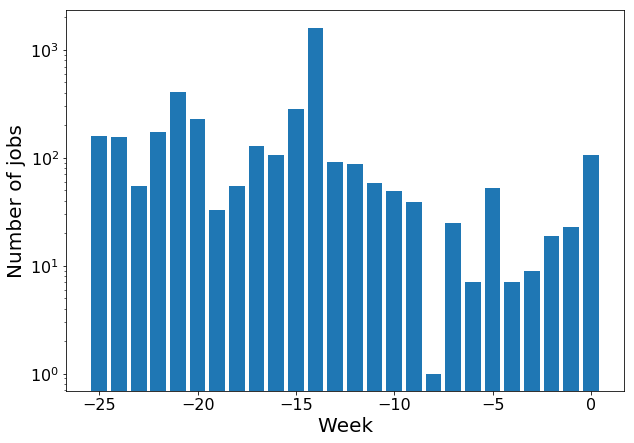

In [53]:
plt.bar(df.dt.value_counts().index, df.dt.value_counts(), log=True)
plt.xlabel('Week')
plt.ylabel('Number of jobs')

# Scripts

Percentage of null scripts:

In [54]:
pct_null_scripts = 100 * df[df.script.isnull()].shape[0] / df.shape[0]
pct_null_scripts

2.118003025718608

In [55]:
scripts = df[df.script.notnull()]

In [56]:
pct_contain_mem = 100 * scripts[scripts.script.str.contains('mem', case=False)].shape[0] / scripts.shape[0]
pct_contain_mem

98.66048428645028

In [57]:
scripts[~scripts.script.str.contains('mem')].shape

(52, 52)

In [58]:
print(scripts[~scripts.script.str.contains('mem')].script.values[50])

#!/bin/bash
#SBATCH --job-name=mat2try   # Name of the job
#SBATCH --output=logs/mat2try.%j.out  # STDOUT file
#SBATCH --error=logs/mat2try.%j.err   # STDERR file
#SBATCH --nodes=1                # Node count
#SBATCH --ntasks=1               # Number of tasks across all nodes
#SBATCH --cpus-per-task=12       # Cores per task (>1 if multi-threaded tasks)
#SBATCH --time=18:00:00          # Run time limit (HH:MM:SS)
#SBATCH --mail-type=all          # Email on job start, end, and fault
#SBATCH --mail-user=zywang@princeton.edu


module load matlab/R2019a
cd /tigress/zywang/code/MotionMapper-master
matlab -r "run('/tigress/zywang/code/MotionMapper-master/compile_mex_files.m')"
matlab -r "run('/tigress/zywang/code/MotionMapper-master/multibehaviorclusteringv5_forcluster_v2.m');exit;"



In [59]:
scripts[~scripts.script.str.contains('mem') & ~scripts.script.str.contains('SINGULARITY')].shape

(12, 52)

In [60]:
for i in range(12):
    print(scripts[~scripts.script.str.contains('mem') & ~scripts.script.str.contains('SINGULARITY')].script.values[i])
    print(scripts[~scripts.script.str.contains('mem') & ~scripts.script.str.contains('SINGULARITY')].jobid.values[i])
    print(scripts[~scripts.script.str.contains('mem') & ~scripts.script.str.contains('SINGULARITY')]['@end'].values[i])
    print("=====================================================")

#!/bin/bash

cd /home/ac77/ondemand/data/sys/dashboard/batch_connect/sys/rstudio_server/output/c8dbc5c4-0f75-4c8b-bfd0-7b1d78190a58

# Export useful connection variables
export host
export port

# Generate a connection yaml file with given parameters
create_yml () {
  echo "Generating connection YAML file..."
  (
    umask 077
    echo -e "host: $host\nport: $port\npassword: $password" > "/home/ac77/ondemand/data/sys/dashboard/batch_connect/sys/rstudio_server/output/c8dbc5c4-0f75-4c8b-bfd0-7b1d78190a58/connection.yml"
  )
}

# Cleanliness is next to Godliness
clean_up () {
  echo "Cleaning up..."
  [[ -e "/home/ac77/ondemand/data/sys/dashboard/batch_connect/sys/rstudio_server/output/c8dbc5c4-0f75-4c8b-bfd0-7b1d78190a58/clean.sh" ]] && source "/home/ac77/ondemand/data/sys/dashboard/batch_connect/sys/rstudio_server/output/c8dbc5c4-0f75-4c8b-bfd0-7b1d78190a58/clean.sh"
  [[ ${SCRIPT_PID} ]] && pkill -P ${SCRIPT_PID} || :
  pkill -P $$
  exit ${1:-0}
}

# Source in all the helper functions

28449798
2020-01-23T13:53:42.000000000
#!/bin/bash
#SBATCH --job-name=mat2try   # Name of the job
#SBATCH --output=logs/mat2try.%j.out  # STDOUT file
#SBATCH --error=logs/mat2try.%j.err   # STDERR file
#SBATCH --nodes=1                # Node count
#SBATCH --ntasks=1               # Number of tasks across all nodes
#SBATCH --cpus-per-task=12       # Cores per task (>1 if multi-threaded tasks)
#SBATCH --time=24:00:00          # Run time limit (HH:MM:SS)
#SBATCH --mail-type=all          # Email on job start, end, and fault
#SBATCH --mail-user=zywang@princeton.edu


module load matlab/R2019a
cd /tigress/zywang/code/MotionMapper-master
matlab -r "run('/tigress/zywang/code/MotionMapper-master/compile_mex_files.m')"
matlab -r "run('/tigress/zywang/code/MotionMapper-master/multibehaviorclusteringv5_forcluster_v2.m');exit;"

28449796
2020-01-23T13:52:54.000000000
#!/bin/bash
#SBATCH --job-name=mat2try   # Name of the job
#SBATCH --output=logs/mat2try.%j.out  # STDOUT file
#SBATCH --error=logs/m

In [61]:
scripts[~scripts.script.str.contains('mem')].jobid.values[50]

28449794

In [62]:
scripts[scripts.script.str.contains('/home/SINGULARITY')].shape

(40, 52)

In [63]:
print(scripts[~scripts.script.str.contains('mem')].script.values[-45])

#!/bin/bash
export PATH=/home/SINGULARITY/images/desktop/bin:$PATH
export WEBSOCKIFY_CMD=/home/SINGULARITY/images/desktop/bin/websockify

cd /home/dkoffman/ondemand/data/sys/dashboard/batch_connect/sys/xstata/output/c1359f21-84b5-43d7-9132-55c9c38e2088

# Export useful connection variables
export host
export port

# Generate a connection yaml file with given parameters
create_yml () {
  echo "Generating connection YAML file..."
  (
    umask 077
    echo -e "host: $host\nport: $port\npassword: $password\ndisplay: $display\nwebsocket: $websocket\nspassword: $spassword" > "/home/dkoffman/ondemand/data/sys/dashboard/batch_connect/sys/xstata/output/c1359f21-84b5-43d7-9132-55c9c38e2088/connection.yml"
  )
}

# Cleanliness is next to Godliness
clean_up () {
  echo "Cleaning up..."
  [[ -e "/home/dkoffman/ondemand/data/sys/dashboard/batch_connect/sys/xstata/output/c1359f21-84b5-43d7-9132-55c9c38e2088/clean.sh" ]] && source "/home/dkoffman/ondemand/data/sys/dashboard/batch_connect/sys/xstata/o

In [64]:
print(scripts[scripts.script.str.contains('mem')])

               @eligible                @end              @start  \
0    2020-07-22 03:27:46 2020-07-22 03:49:28 2020-07-22 03:27:51   
1    2020-07-22 03:16:08 2020-07-22 03:26:45 2020-07-22 03:16:14   
2    2020-07-22 03:12:12 2020-07-22 03:14:20 2020-07-22 03:12:27   
3    2020-07-21 17:11:40 2020-07-21 18:50:07 2020-07-21 17:12:21   
4    2020-07-21 17:11:40 2020-07-21 18:46:05 2020-07-21 17:12:21   
5    2020-07-21 17:11:40 2020-07-21 18:46:55 2020-07-21 17:12:21   
6    2020-07-21 17:11:40 2020-07-21 18:47:26 2020-07-21 17:12:21   
7    2020-07-21 17:11:40 2020-07-21 18:49:48 2020-07-21 17:12:21   
8    2020-07-21 17:11:39 2020-07-21 18:45:40 2020-07-21 17:12:05   
9    2020-07-21 17:11:39 2020-07-21 18:47:24 2020-07-21 17:12:05   
10   2020-07-21 17:11:39 2020-07-21 18:46:28 2020-07-21 17:12:05   
11   2020-07-21 15:51:16 2020-07-22 00:13:55 2020-07-21 15:51:22   
12   2020-07-21 13:13:51 2020-07-21 13:22:45 2020-07-21 13:14:10   
13   2020-07-17 15:50:26 2020-07-21 01:44:13 202

In [65]:
scripts[scripts.script.str.contains('gpu:1')].script.values

array(['#!/bin/bash \n#SBATCH -N 4 # node count \n#SBATCH --ntasks-per-node=28\n##SBATCH --gres=gpu:1\n#SBATCH -J Deep\n#SBATCH -p datascience \n#SBATCH -t 4:00:00 \n# sends mail when process begins, and \n# when it ends. Make sure you define your email \n##SBATCH --mail-type=begin \n##SBATCH --mail-type=end \n##SBATCH --mail-user=bw16@princeton.edu \n\n# Load openmpi environment \n#module load intel lapack intel-mpi \nmodule load openmpi/gcc/3.0.0/64 intel-mkl/2017.4/5/64\n\nsrun /home/bw16/q-e/bin/pw.x <01.in> 232.out\n\n\n'],
      dtype=object)

In [66]:
scripts[scripts.script.str.contains('OMP_NUM_THREADS')].username.value_counts()

sbenton     301
tgartner     13
zgarvin       2
Name: username, dtype: int64

In [67]:
scripts[scripts.script.str.contains('module load fftw')].username.value_counts()

ferdowsi    3
Name: username, dtype: int64

In [68]:
scripts[scripts.script.str.contains('gmx')].username.value_counts()

Series([], Name: username, dtype: int64)

In [69]:
scripts[scripts.script.str.contains('lmp')].username.value_counts()

ferdowsi    3
Name: username, dtype: int64

In [70]:
scripts[scripts.script.str.contains('python')].username.value_counts()

jiachenl    416
sbenton     206
aerez       108
mtm2         29
yibings      24
peirongl     20
nvrocha      16
adorjani     11
jknodt       11
aj13         10
ab50          8
gwg3          5
shuow         4
jkutasov      2
ac77          2
plazonic      2
Name: username, dtype: int64

## cpu_hours

In [71]:
df[df.cpu_hours.isnull()].shape[0]

0

Text(0, 0.5, 'Count')

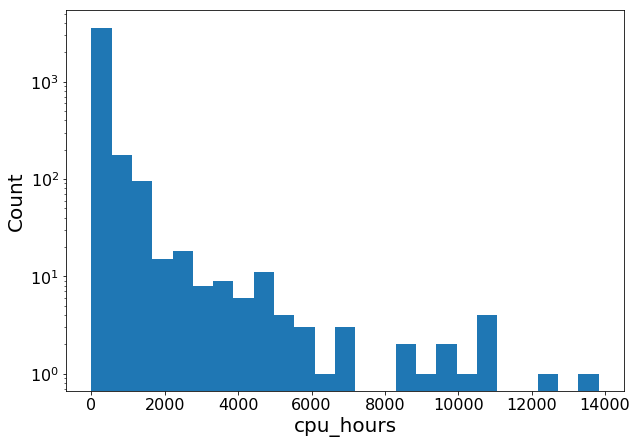

In [72]:
plt.hist(df.cpu_hours, bins=25, log=True)
plt.xlabel('cpu_hours')
plt.ylabel('Count')

In [73]:
df.groupby('username').agg({'cpu_hours':np.sum}).sort_values('cpu_hours', ascending=False)[:10]

,cpu_hours
username,
kirylp,434769.947
karahan,123338.529
jiachenl,99475.054
sbenton,33212.577
ab50,29091.250
joledan,27919.384
aerez,15194.106
mcahn,13767.001
ac77,5712.213


In [74]:
print(df.script.values[9])

#!/usr/bin/env bash
#SBATCH --job-name=nsi_sim_grp2
#SBATCH --mem=204800
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=40
#SBATCH --cpus-per-task=1
#SBATCH --time=3:30:00
#SBATCH --partition=physics
set -x
cd $SLURM_SUBMIT_DIR
export OMP_NUM_THREADS=1
mpiexec -n 40  /home/sbenton/spider_tools/scratch/sjb/nsi/simulation_spectra.py --output /scratch/gpfs/sbenton/spider/nsi_spectra --nsi-root /tigress/sbenton/spider/maps/nsi_maps --r 0.32 --r0 1.0 --n-chunks 14 --template-freq 217 --template-subset full --no-spider-noise --no-template-noise --freqs 90 147 --alphas 0.0 0.0 --sim-index 25
mpiexec -n 40  /home/sbenton/spider_tools/scratch/sjb/nsi/simulation_spectra.py --output /scratch/gpfs/sbenton/spider/nsi_spectra --nsi-root /tigress/sbenton/spider/maps/nsi_maps --r 0.32 --r0 1.0 --n-chunks 14 --template-freq 217 --template-subset full --no-spider-noise --no-template-noise --freqs 90 147 --alphas 0.0 0.0 --sim-index 26
mpiexec -n 40  /home/sbenton/spider_tools/scratch/sjb/nsi/simulation_spe

In [75]:
print(df[df.jobid == 31191799].script.values[0])

#!/bin/bash
#
#SBATCH --job-name="822"
#SBATCH --time=23:59:00
#SBATCH -N 1
#SBATCH --exclusive
#SBATCH -n 1
#SBATCH --mem=900Gb 
#SBATCH -c 48
#SBATCH --output=run.%j.o
#SBATCH --error=run.%j.e
#======START=====
echo "The current job ID is $SLURM_JOB_ID"
echo "Running on $SLURM_NNODES nodes"
echo "Using $SLURM_NTASKS_PER_NODE tasks per node"
echo "A total of $SLURM_NPROCS tasks is used"
/usr/licensed/bin/matlab -nodisplay -nosplash -r matrixScarsMain_v15
#=====END====



## Check of total cpus

In [105]:
df[df.cpus_per_task < 1].shape[0]

0

In [104]:
df[pd.isna(df.cpus_per_task)].shape[0]

3

We see that cpus_per_task is always defined or null in 3 cases

In [102]:
df.cpus_per_task.value_counts().sort_index()

1.0       642
2.0        14
3.0         1
4.0       158
6.0        95
8.0      1717
10.0      394
12.0       12
14.0       15
15.0        1
16.0       79
18.0        4
20.0       39
22.0        2
24.0       19
25.0       52
27.0        1
28.0        5
30.0       17
32.0       29
40.0        3
48.0      411
56.0        2
64.0      249
128.0       2
Name: cpus_per_task, dtype: int64

In [76]:
def num_cpus(row):
    calc1 = max(row['total_nodes'], 1) * row['ntasks_per_node'] * row['cpus_per_task']
    calc2 = max(row['ntasks'], 1) * row['cpus_per_task']
    return max(calc1, calc2)

In [77]:
df['mytotal_cpus'] = df.apply(lambda row: num_cpus(row), axis=1)

In [78]:
df[(df.total_cpus != df.mytotal_cpus) & (df.nodes != '(null)')][['total_cpus', 'ntasks', 'total_nodes', 'ntasks_per_node', 'cpus_per_task', 'nodes', 'jobid']]

,total_cpus,ntasks,total_nodes,ntasks_per_node,cpus_per_task,nodes,jobid
128,96,1,1,0,48.0,della-h12n5,31191799
129,96,1,1,0,48.0,della-h12n4,31191797
135,96,1,1,0,48.0,della-h12n6,31184168
136,96,1,1,0,48.0,della-h12n5,31184146
137,96,1,1,0,48.0,della-h12n4,31184138
139,96,1,1,0,48.0,della-h12n8,31184064
140,96,1,1,0,48.0,della-h12n7,31184061
141,96,1,1,0,48.0,della-h12n6,31184043
142,96,1,1,0,48.0,della-h12n4,31184026
143,96,1,1,0,48.0,della-h12n6,31183964


## QoS

In [79]:
df.qos.value_counts()

vlong     2416
short      833
test       353
medium     337
Name: qos, dtype: int64

In [80]:
df[df.qos.isnull()].shape[0]

27

## Queue wait

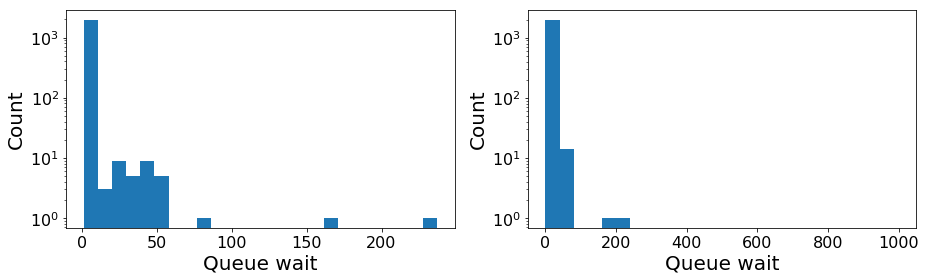

In [81]:
plt.figure(figsize=(13, 4))

plt.subplot(121)
plt.hist(df.queue_wait.value_counts().values, bins=25, log=True)
plt.xlabel('Queue wait')
plt.ylabel('Count')
#plt.title(mytitle)

plt.subplot(122)
plt.hist(df.queue_wait.value_counts().values, bins=25, log=True, range=(0, 1000))
plt.xlabel('Queue wait')
plt.ylabel('Count')
#plt.title(mytitle)

plt.tight_layout()

## Account and groupname

In [82]:
df[df.account.isnull()].shape[0]

0

In [83]:
df.account.value_counts()

molbio      1834
physics     1080
politics     398
ee           302
cses          89
eeb           84
cee           60
socio         44
cs            26
wws           17
chem          17
geo            5
genomics       5
econ           4
geoclim        1
Name: account, dtype: int64

In [84]:
df[df.groupname.isnull()].shape[0]

0

In [85]:
df.groupname.value_counts()

molbio      1832
physics     1082
politics     398
ee           302
cses          89
eeb           84
cee           60
socio         44
cs            26
wws           17
chem          17
geo            5
genomics       5
econ           4
geoclim        1
Name: groupname, dtype: int64

## State

In [86]:
df[df.state.isnull()].shape[0]

0

Text(0.5, 0, 'Count')

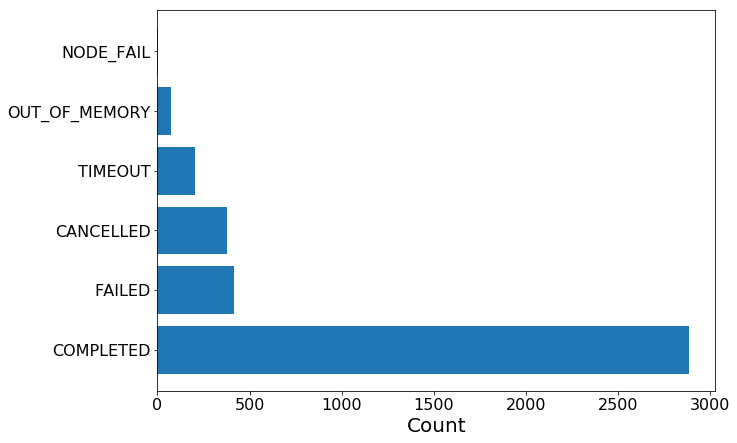

In [87]:
plt.barh(df.state.value_counts().index, df.state.value_counts().values)
plt.xlabel('Count')
#plt.title(mytitle)

## Partition

In [88]:
df[df.partition.isnull()].shape[0]

0

Text(0, 0.5, 'Count')

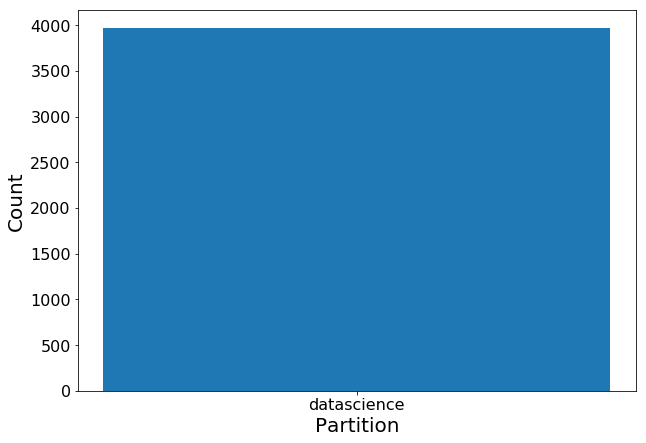

In [89]:
plt.bar(df.partition.value_counts().index, df.partition.value_counts().values)
plt.xlabel('Partition')
plt.ylabel('Count')
#plt.title(mytitle)

## work_dir

In [90]:
df[df.work_dir.isnull()].shape[0]

0

In [91]:
df[df.work_dir.str.startswith('/scratch/gpfs/')].shape[0]

760

In [92]:
df[df.work_dir.str.startswith('/scratch/network/')].shape[0]

3

In [93]:
df['start_dir'] = df.work_dir.apply(lambda x: x.split('/')[1])
df.start_dir.value_counts()

tigress     2255
home         783
scratch      763
projects     165
Name: start_dir, dtype: int64

Text(0, 0.5, 'Count')

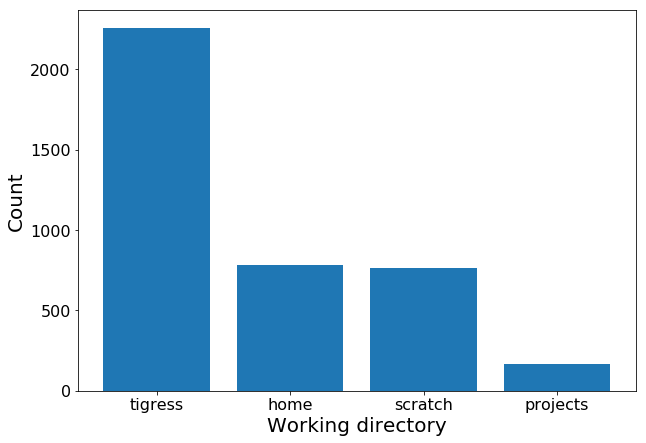

In [94]:
plt.bar(df.start_dir.value_counts().index, df.start_dir.value_counts().values)
plt.xlabel('Working directory')
plt.ylabel('Count')

## job_name

In [95]:
df[df.job_name.notnull() & df.job_name.str.contains('flow')].job_name

Series([], Name: job_name, dtype: object)

In [96]:
df[df.job_name.isnull()].shape[0]

0